In [6]:
import numpy as np
from matplotlib import pyplot as plt

# Taller 3 Métodos númericos - Natalia Giraldo, Valerie Olave

## Punto 1

Se nos presenta una tabla con los siguientes datos:

In [9]:
mes = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
ventas = np.array([15,18.2,17,19.5,21,23,22.5,24,25,27.5,28,30])

### A.  Realice el gráfico de dispersión y la respectiva gráfica de la regresión lineal

Para realizar esto, primero necesitamos saber cual es la regresión lineal que más se ajusta a nuestros datos. Para eso definimos las funciones de min_cuad y min_cuad_parabola

In [5]:
def min_cuad(x, y):
    sumXY = 0
    sumXX = 0
    sumX = 0
    sumY = 0
    n = len(x)
    for i in range(len(x)):
        sumXY += x[i] * y[i]
        sumXX += x[i] ** 2
        sumX += x[i]
        sumY += y[i]

    A = np.array([[n, sumX], [sumX, sumXX]])
    B = np.array([sumY, sumXY])
    Ainv = np.linalg.inv(A)
    S = np.dot(Ainv,B)
    #print('A-1: ', Ainv)
    #print()
    #print('S: ', S)
    a1 = (n * sumXY - sumX * sumY) / (n * sumXX - sumX ** 2)
    a0 = (sumY - a1 * sumX) / n
    return a0, a1

In [8]:
def Gauss(sumXX,sumXY,sumXXY,sumXXX,sumXXXX,sumX,sumY,n):
    A = np.array([[n, sumX, sumXX], [sumX, sumXX,sumXXX],[sumXX,sumXXX,sumXXXX]])
    B = np.array([sumY, sumXY, sumXXY])
    Ainv = np.linalg.inv(A)
    S = np.dot(Ainv,B)

    return S

def min_cuad_parabola(x, y):
    sumXY = 0
    sumXX = 0
    sumXXY = 0
    sumXXX = 0
    sumXXXX = 0
    sumX = 0
    sumY = 0
    n = len(x)
    for i in range(len(x)):
        sumXY += x[i] * y[i]
        sumXX += x[i] ** 2
        sumXXX += x[i]**3
        sumXXXX += x[i]**4
        sumXXY += (x[i]**2) * y[i]
        sumX += x[i]
        sumY += y[i]

    a0,a1,a2 = Gauss(sumXX,sumXY,sumXXY,sumXXX,sumXXXX,sumX,sumY,n)
    #print('A-1: ', Ainv)
    #print()
    #print('S: ', S)
    return a0,a1,a2

In [20]:
a0, a1,a2 = min_cuad_parabola(mes, ventas)
print(a0, a1)
y_est = a0 + a1*mes + a2 * mes**2

media_y = np.mean(ventas)
num = np.sum((y_est-media_y) ** 2)
den = np.sum((ventas-media_y) ** 2)
r = np.sqrt(num/den)
print('Coeficiente correlación min_cuad_parabola =', r)

14.470454545454329 1.2016233766234528
Coeficiente correlación min_cuad_parabola = 0.986310548236185


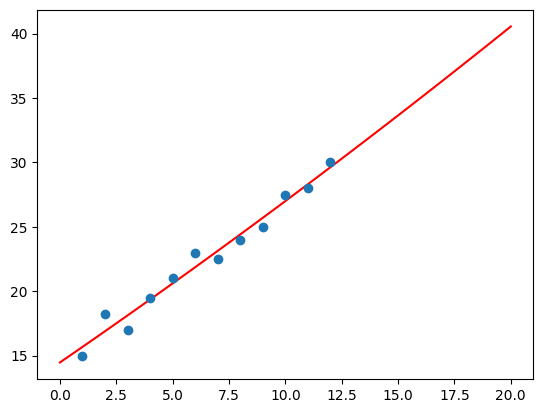

In [21]:
resol = 100
xx = np.linspace(0, 20, resol)
yy = a0 + a1*xx + a2 * xx**2

fig,ax = plt.subplots()
ax.plot(xx, yy, 'r')
ax.plot(mes, ventas, 'o')
plt.show()

In [23]:
a0, a1 = min_cuad(mes, ventas)
print(a0, a1)

y_est = a0 + a1 * mes

num = np.sum((y_est-media_y) ** 2)
den = np.sum((ventas-media_y) ** 2)
r = np.sqrt(num/den)
print('coeficiente correlación min_cuad =', r)

14.315151515151499 1.2681818181818207
coeficiente correlación min_cuad = 0.9862355368048499


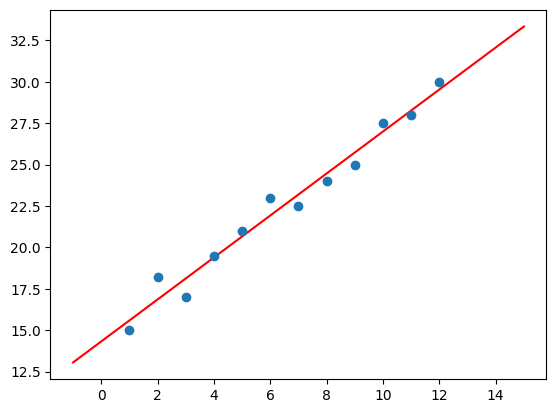

In [11]:
resol = 20
xx = np.linspace(-1, 15, resol)
yy = a0 + a1 * xx

fig,ax = plt.subplots()
ax.plot(xx, yy, 'r')
ax.plot(mes, ventas, 'o')
plt.show()

Según lo observado mediante el gráfico y el cálculo de coeficiente de correlación para ambas regresiones lineales, decimos que el que mejor se ajusta es min_cuad_parabola

### B. Calcule las variaciones total, explicada e inexplicada

In [15]:
media_y = np.mean(ventas)
ve = sum((y_est - media_y) ** 2)
print('ve =', ve)

vi = sum((ventas - y_est) ** 2)
print('vi =', vi)

vt = ve + vi
print('vt =', vt)

ve = 230.0197585747784
vi = 6.429408091908085
vt = 236.44916666668647


Ni idea de que es eso.

### C. Calcule el coeficiente de correlación

In [17]:
num = np.sum((y_est-media_y) ** 2)
den = np.sum((ventas-media_y) ** 2)
r = np.sqrt(num/den)
print('r =', r)

r = 0.986310548236185


El coeficiente de correlación nos dice que tan relacionados están los datos dentro de un conjunto de datos. Con un valor de 0.9863 decimos que los datos presentados sobre las ventas mensuales están bastantes relacionados

### D.  Realice la predicción de las ventas cuando se tiene el mes 13

In [24]:
x_pred = 13
y_pred = a0 + a1 * x_pred
print(a0, a1)
print('y_pred =', y_pred)

14.315151515151499 1.2681818181818207
y_pred = 30.80151515151517


Como se observa, para el mes 13, el valor de las ventas será de 30.8

r = 0.9891372017430464


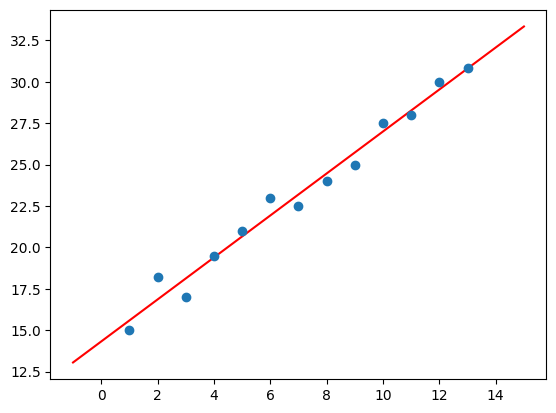

In [25]:
x_dato = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13])
y_dato = np.array([15,18.2,17,19.5,21,23,22.5,24,25,27.5,28,30,y_pred])


a0, a1 = min_cuad(x_dato, y_dato)

y_est = a0 + a1 * x_dato

media_y = np.mean(y_dato)

num = np.sum((y_est-media_y) ** 2)
den = np.sum((y_dato-media_y) ** 2)
r = np.sqrt(num/den)
print('r =', r)

resol = 20
xx = np.linspace(-1, 15, resol)
yy = a0 + a1 * xx

fig,ax = plt.subplots()
ax.plot(xx, yy, 'r')
ax.plot(x_dato, y_dato, 'o')
plt.show()

Además, se aprecia como el coeficiente de correlación aumenta

### E. usando el método de sumas de Riemann, calcular los ingresos anuales acumulados por concepto de ventas.

In [26]:
def f(x):
    return a0 + a1 * x

n_rec = 12
a=0
b=12
delta_x = (b-a)/n_rec
x = np.linspace(a,b,n_rec+1)
#print(x,delta_x)

sum_izq = 0
sum_der = 0
sum_med = 0
for i in range(len(x)-1):
    sum_izq += f(x[i]) * delta_x
    sum_der += f(x[i+1]) * delta_x
    sum_med += f((x[i+1]+x[i])/2) * delta_x

print('{:<30} {:<30} {:<30}'. format('Ext izq', 'medio', 'ext der'))
print('{:<30} {:<30} {:<30}'. format(sum_izq,sum_med,sum_der))

Ext izq                        medio                          ext der                       
255.4818181818181              263.09090909090907             270.7                         


### F: Usando el método de integración Simpson 1/3, calcular los ingresos anuales acumulados (suavizados). Esto se logra integrando las ventas como función del tiempo.

Para resolver esto, primero necesitamos el método de simpson 1/3, donde la función a integrar son las ventas estimadas obtenidas con anterioridad.

In [ ]:
def f(x):
    return a0 + a1 * x

a = 1
b = 13
n = 13
x = np.linspace(a, b, n+1)
suma_par = 0
suma_impar = 0

for i in range(1,len(x)-1):
    if i % 2 == 0:
        suma_par +=f(x[i])
    else:
        suma_impar +=f(x[i])

integral = (b-a) * (f(x[0]) + 4*suma_impar + 2*suma_par + f(x[n]))/(3*n)
print('Integral =', integral)

Vemos que el resultado usando la regla de simpson 1/3 (269) es similar a los ingresos anuales acumulados reales con un valor de  270.71, por lo que se puede decir que el método realiza una buena aproximación a los ingresos anuales acumulados

### G:  Teniendo presente los dos items anteriores ¿coinciden los ingresos por concepto de ventas usando ambos métodos?

Calculando los ingresos anuales mediante ambos métodos (Suma de Riemman y regla de Simpson 1/3) podemos afirmar que si coinciden, sin embargo, la suma de Riemman fue más precisa en este caso, pues nos da el valor exacto de los ingresos anuales de 270.71, mientras que usando Simpson 1/3 nos da una buena aproximación de 269. Por lo que se puede afirmar que ambos métodos son válidos a pesar de tener distinta precisión

## Punto 2

### A.  La función de interpolación que mejor se ajuste a los datos usando el método de Lagrange

La función de interpolación que mejor se ajusta a los datos son las ventas estimadas que fueron obtenidas con anterioridad

### B. Realice la predicción de ingresos debido a las ventas en el mes 13, suponiendo que podemos extrapolar usando la función de Lagrange

In [ ]:
def f(x):
    return  a0 + a1 * x

def Lag(a,b,n,f,x):
    xi = np.linspace(a,b,n+1)
    sum = 0
    for i in range(n+1):
        prod = 1
        for j in range(n+1):
            if j != i:
                prod *= (x-xi[j])/(xi[i] - xi[j])
        sum += prod*f(xi[i])
    return sum

x = 13
InterpLag = Lag(1,13,13,f,x)
error = abs(InterpLag - f(x))/(f(x))
print('\n')

print('{:<20} {:<20} {:<20}'.format('f(x)', 'Lagrange', '%Error'))
print('{:<20} {:<20} {:<20}'.format(f(x), InterpLag, error*100))

Se realiza la predicción de ventas del mes 13 usando la función de Lagrange, de modo que la función de interpolación es la de las ventas estimadas, como fue explicado en el inciso anterior; Lo que hace la función de lagrange es que construye un polinomio que pasa por los puntos conocidos, y a partir de este punto, se extrapola para estimar el valor en el mes 13.

### C.  ¿La predicción del ingreso por ventas usando la interpolación de Lagrange difiere en gran medida con aquella predicción usando el método de mínimos cuadrados?

Las predicciones realizadas mediante interpolación de Lagrange y el método de mínimos cuadrados no difiere para nada, pues con ambos métodos la predicción de ventas para el mes 13 es de 30.8